# Construction salaire/localisation 2020

<u>salaires_2020.csv :</u> 


## Salaires et revenus d'activité

* CODGEO
* SUPERF	
* reg
* dep
* libelle	
* EU_circo	
* code_chef_lieu	
* chef_lieu_libelle	
* LIBELLE_DEP	
* LIBELLE_REG	
* Code_postal
* latitude 
* longitude
* PTOT    
* SNHM20	: Salaire net horaire moyen en 2020 (€)

* SNHM1820	: Salaire net horaire moyen 18 à 25 ans en 2020 (€)
* SNHM2620	: Salaire net horaire moyen 26 à 50 ans en 2020 (€)
* SNHM5020	: Salaire net horaire moyen plus de 50 ans en 2020 (€)

* SNHMC20	: Salaire net hor. Moy. Cadres sup. en 2020 (€)
* SNHME20	: Salaire net hor. moy. employés en 2020 (€)
* SNHMO20	: Salaire net hor. moy. ouvriers en 2020 (€)	
* SNHMP20	: Salaire net hor. moy. prof inter. en 2020 (€)	

* SNHMF20	: Salaire net horaire moyen F en 2020 (€)	
* SNHMH20	: Salaire net horaire moyen H en 2020 (€)

* SNHMF1820	: Salaire net horaire moyen F 18 à 25 ans en 2020 (€)
* SNHMF2620	: Salaire net horaire moyen F 26 à 50 ans en 2020 (€)
* SNHMF5020	: Salaire net horaire moyen F plus de 50 ans en 2020 (€)

* SNHMH1820	: Salaire net horaire moyen H 18 à 25 ans en 2020 (€)	
* SNHMH2620	: Salaire net horaire moyen H 26 à 50 ans en 2020 (€)
* SNHMH5020	: Salaire net horaire moyen H plus de 50 ans en 2020 (€)

* SNHMFC20	: Salaire net hor. moy. F cadres sup. en 2020 (€)
* SNHMFE20	: Salaire net hor. moy. F employés en 2020 (€)
* SNHMFO20	: Salaire net hor. moy. F ouvriers en 2020 (€)
* SNHMFP20	: Salaire net hor. moy. F prof inter. en 2020 (€)

* SNHMHC20	: Salaire net hor. moy. H cadres sup. en 2020 (€)	
* SNHMHE20	: Salaire net hor. moy. H employés en 2020 (€)	
* SNHMHO20	: Salaire net hor. moy. H ouvriers en 2020 (€)	
* SNHMHP20	: Salaire net hor. moy. H prof inter. en 2020 (€)	


In [1]:
# Suppression des warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Lecture fichier csv
salaires = pd.read_csv('../2020/salaires_2020_v3.csv',encoding= "utf-8",index_col=0,
                       dtype={'reg':'str','Code_postal':'str','DEP':'str','PTOT':'int64'})

salaires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5375 entries, 2 to 34982
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CODGEO             5375 non-null   object 
 1   SUPERF             5375 non-null   float64
 2   reg                5375 non-null   object 
 3   dep                5375 non-null   object 
 4   libelle            5375 non-null   object 
 5   EU_circo           5375 non-null   object 
 6   code_chef_lieu     5375 non-null   object 
 7   chef_lieu_libelle  5375 non-null   object 
 8   LIBELLE_DEP        5375 non-null   object 
 9   LIBELLE_REG        5375 non-null   object 
 10  Code_postal        5375 non-null   object 
 11  latitude           5375 non-null   float64
 12  longitude          5375 non-null   float64
 13  PTOT               5375 non-null   int64  
 14  SNHM20             5375 non-null   float64
 15  SNHMC20            5375 non-null   float64
 16  SNHMP20            5375

In [3]:
dict_columns = {'CODGEO': 'CODGEO','SUPERF':'superficie','reg':'no_region','dep':'no_dep','libelle':'nom_commune',
                'EU_circo':'EU_circo','code_chef_lieu': 'no_chef_lieu','chef_lieu_libelle':'nom_chef_lieu',
                'LIBELLE_DEP': 'nom_dep','LIBELLE_REG':'nom_region','Code_postal':'code_postal','latitude':'latitude',
                'longitude':'longitude','PTOT':'pop_tot','SNHM20' : 'S_tous','SNHMC20':'S_cadre','SNHMP20':'S_inter',
                'SNHME20':'S_emp','SNHMO20':'S_ouv','SNHMF20':'S_femme','SNHMFC20':'S_F_cadre','SNHMFP20':'S_F_inter',
                'SNHMFE20':'S_F_emp','SNHMFO20':'S_F_ouv','SNHMH20':'S_homme','SNHMHC20':'S_H_cadre','SNHMHP20':'S_H_inter',
                'SNHMHE20':'S_H_emp','SNHMHO20':'S_H_ouv','SNHM1820':'S_18_25','SNHM2620':'S_26_50','SNHM5020':'S_50plus',
                'SNHMF1820':'S_F_18_25','SNHMF2620':'S_F_26_50','SNHMF5020':'S_F_50plus','SNHMH1820':'S_H_18_25',
                'SNHMH2620':'S_H_26_50','SNHMH5020':'S_50plus','C19_H15P_CS3':'P_H_cadre','C19_F15P_CS3':'P_F_cadre',
                'C19_H15P_CS4':'P_H_inter','C19_F15P_CS4':'P_F_inter','C19_H15P_CS5':'P_H_emp','C19_F15P_CS5':'P_F_emp',
                'C19_H15P_CS6':'P_H_ouv','C19_F15P_CS6':'P_F_ouv'}

salaires = salaires.rename(columns=dict_columns)

In [4]:
salaires = salaires.sort_values('CODGEO')
salaires = salaires.reset_index(drop=True)

salaires.head()

,CODGEO,superficie,no_region,no_dep,nom_commune,EU_circo,no_chef_lieu,nom_chef_lieu,nom_dep,nom_region,...,S_H_26_50,S_50plus,P_H_cadre,P_F_cadre,P_H_inter,P_F_inter,P_H_emp,P_F_emp,P_H_ouv,P_F_ouv
0,01004,24.60,84,01,Ambérieu-en-Bugey,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,...,16.130620,19.226540,454.730512,329.495147,940.860061,949.383869,502.095828,1389.037519,1459.546317,542.204170
1,01007,33.55,84,01,Ambronay,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,...,16.229187,19.324302,145.000000,65.000000,200.000000,230.000000,60.000000,315.000000,275.000000,70.000000
2,01014,23.49,84,01,Arbent,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,...,15.517659,18.409024,55.065519,39.948799,129.576354,134.723311,70.732624,251.032604,449.344570,133.154849
3,01024,18.69,84,01,Attignat,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,...,15.505663,18.422798,118.137676,70.957577,233.973035,238.427095,75.782272,382.133128,302.994596,60.174911
4,01025,56.87,84,01,Bâgé-Dommartin,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,...,15.580433,18.421533,125.000000,80.000000,295.000000,335.000000,70.000000,470.000000,440.000000,85.000000


In [5]:
salaires.isna().sum()

CODGEO           0
superficie       0
no_region        0
no_dep           0
nom_commune      0
EU_circo         0
no_chef_lieu     0
nom_chef_lieu    0
nom_dep          0
nom_region       0
code_postal      0
latitude         0
longitude        0
pop_tot          0
S_tous           0
S_cadre          0
S_inter          0
S_emp            0
S_ouv            0
S_femme          0
S_F_cadre        0
S_F_inter        0
S_F_emp          0
S_F_ouv          0
S_homme          0
S_H_cadre        0
S_H_inter        0
S_H_emp          0
S_H_ouv          0
S_18_25          0
S_26_50          0
S_50plus         0
S_F_18_25        0
S_F_26_50        0
S_F_50plus       0
S_H_18_25        0
S_H_26_50        0
S_50plus         0
P_H_cadre        0
P_F_cadre        0
P_H_inter        0
P_F_inter        0
P_H_emp          0
P_F_emp          0
P_H_ouv          0
P_F_ouv          0
dtype: int64

In [6]:
salaires.describe()

,superficie,latitude,longitude,pop_tot,S_tous,S_cadre,S_inter,S_emp,S_ouv,S_femme,...,S_H_26_50,S_50plus,P_H_cadre,P_F_cadre,P_H_inter,P_F_inter,P_H_emp,P_F_emp,P_H_ouv,P_F_ouv
count,5375.000000,5375.000000,5375.000000,5.375000e+03,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,...,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000
mean,28.890956,46.282196,1.924404,9.825364e+03,15.382245,25.144368,15.836407,11.568558,12.128105,13.777733,...,16.011415,19.546744,478.669304,355.813436,511.634208,612.142092,345.501167,936.163515,714.407227,175.925632
std,129.006004,6.199315,8.207728,3.764700e+04,2.998456,3.469795,1.424900,0.715066,0.773611,2.232349,...,3.105952,5.450925,4275.217942,3807.879144,1991.900590,2618.783091,1451.045860,2894.508626,1670.088106,430.128513
min,0.510000,-21.339621,-61.779711,1.977000e+03,10.898372,16.564826,12.719642,9.110098,8.862014,10.396209,...,10.655063,11.799594,0.000000,0.000000,15.027204,14.706186,5.096827,83.952772,19.815956,0.000000
25%,8.920000,45.118010,0.093541,2.793000e+03,13.500221,23.051383,15.061679,11.069631,11.639738,12.353636,...,14.027210,16.238012,75.000000,50.000000,147.737504,167.261269,74.584227,276.579656,230.142172,50.000000
50%,16.600000,47.357912,2.491793,4.194000e+03,14.609619,24.585754,15.641420,11.431392,12.067317,13.165610,...,15.312215,18.129711,142.741056,95.687585,228.105832,258.267018,120.941810,415.000000,347.854375,88.429024
75%,31.090000,48.773220,4.823916,7.954000e+03,16.309037,26.559171,16.405403,11.940879,12.559183,14.501226,...,17.108358,21.235464,299.594870,203.864095,420.000000,495.000000,249.343527,778.638270,628.582049,163.159062
max,6332.600000,51.072906,55.754535,2.162598e+06,48.719548,60.660752,67.814726,17.025973,17.978364,34.604539,...,50.316251,82.240539,292487.237979,265720.068647,114168.856206,155130.060440,79865.187652,145231.854259,58845.937150,19203.797510


In [7]:
salaires.columns

Index(['CODGEO', 'superficie', 'no_region', 'no_dep', 'nom_commune',
       'EU_circo', 'no_chef_lieu', 'nom_chef_lieu', 'nom_dep', 'nom_region',
       'code_postal', 'latitude', 'longitude', 'pop_tot', 'S_tous', 'S_cadre',
       'S_inter', 'S_emp', 'S_ouv', 'S_femme', 'S_F_cadre', 'S_F_inter',
       'S_F_emp', 'S_F_ouv', 'S_homme', 'S_H_cadre', 'S_H_inter', 'S_H_emp',
       'S_H_ouv', 'S_18_25', 'S_26_50', 'S_50plus', 'S_F_18_25', 'S_F_26_50',
       'S_F_50plus', 'S_H_18_25', 'S_H_26_50', 'S_50plus', 'P_H_cadre',
       'P_F_cadre', 'P_H_inter', 'P_F_inter', 'P_H_emp', 'P_F_emp', 'P_H_ouv',
       'P_F_ouv'],
      dtype='object')

In [8]:
salaires_temp = salaires.copy()
colonnes_base = ['CODGEO','superficie','no_region','no_dep','nom_commune','EU_circo', 'no_chef_lieu', 'nom_chef_lieu', 
            'nom_dep', 'nom_region','code_postal', 'latitude', 'longitude']

colonnes_temp = colonnes_base


In [9]:
salaires_F_cadre = salaires_temp[colonnes_temp]
salaires_F_cadre['cat_pro'] = 'cadre'
salaires_F_cadre['nbre_actif'] = salaires_temp['P_F_cadre'].astype('int')
salaires_F_cadre['salaire'] = salaires_temp['S_F_cadre']

salaires_F_inter = salaires_temp[colonnes_temp]
salaires_F_inter['cat_pro'] = 'intermediaire'
salaires_F_inter['nbre_actif'] = salaires_temp['P_F_inter'].astype('int')
salaires_F_inter['salaire'] = salaires_temp['S_F_inter']

salaires_F_emp = salaires_temp[colonnes_temp]
salaires_F_emp['cat_pro'] = 'employe'
salaires_F_emp['nbre_actif'] = salaires_temp['P_F_emp'].astype('int')
salaires_F_emp['salaire'] = salaires_temp['S_F_emp']

salaires_F_ouv = salaires_temp[colonnes_temp]
salaires_F_ouv['cat_pro'] = 'ouvrier'
salaires_F_ouv['nbre_actif'] = salaires_temp['P_F_ouv'].astype('int')
salaires_F_ouv['salaire'] = salaires_temp['S_F_ouv']

salaires_F = pd.DataFrame()
salaires_F = salaires_F.append(salaires_F_cadre)
salaires_F = salaires_F.append(salaires_F_inter)
salaires_F = salaires_F.append(salaires_F_emp)
salaires_F = salaires_F.append(salaires_F_ouv)

salaires_F ['sexe'] = 'F'
salaires_F.head(3)

,CODGEO,superficie,no_region,no_dep,nom_commune,EU_circo,no_chef_lieu,nom_chef_lieu,nom_dep,nom_region,code_postal,latitude,longitude,cat_pro,nbre_actif,salaire,sexe
0,01004,24.60,84,01,Ambérieu-en-Bugey,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,01500,45.961049,5.372275,cadre,329,21.806580,F
1,01007,33.55,84,01,Ambronay,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,01500,46.005691,5.357749,cadre,65,21.532587,F
2,01014,23.49,84,01,Arbent,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,01100,46.283608,5.690756,cadre,39,20.702968,F


In [10]:
salaires_H_cadre = salaires_temp[colonnes_temp]
salaires_H_cadre['cat_pro'] = 'cadre'
salaires_H_cadre['nbre_actif'] = salaires_temp['P_H_cadre'].astype('int')
salaires_H_cadre['salaire'] = salaires_temp['S_H_cadre']

salaires_H_inter = salaires_temp[colonnes_temp]
salaires_H_inter['cat_pro'] = 'intermediaire'
salaires_H_inter['nbre_actif'] = salaires_temp['P_H_inter'].astype('int')
salaires_H_inter['salaire'] = salaires_temp['S_H_inter']

salaires_H_emp = salaires_temp[colonnes_temp]
salaires_H_emp['cat_pro'] = 'employe'
salaires_H_emp['nbre_actif'] = salaires_temp['P_H_emp'].astype('int')
salaires_H_emp['salaire'] = salaires_temp['S_H_emp']

salaires_H_ouv = salaires_temp[colonnes_temp]
salaires_H_ouv['cat_pro'] = 'ouvrier'
salaires_H_ouv['nbre_actif'] = salaires_temp['P_H_ouv'].astype('int')
salaires_H_ouv['salaire'] = salaires_temp['S_H_ouv']

salaires_H = pd.DataFrame()
salaires_H = salaires_H.append(salaires_H_cadre)
salaires_H = salaires_H.append(salaires_H_inter)
salaires_H = salaires_H.append(salaires_H_emp)
salaires_H = salaires_H.append(salaires_H_ouv)

salaires_H ['sexe'] = 'H'
salaires_H.head(3)

,CODGEO,superficie,no_region,no_dep,nom_commune,EU_circo,no_chef_lieu,nom_chef_lieu,nom_dep,nom_region,code_postal,latitude,longitude,cat_pro,nbre_actif,salaire,sexe
0,01004,24.60,84,01,Ambérieu-en-Bugey,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,01500,45.961049,5.372275,cadre,454,26.693345,H
1,01007,33.55,84,01,Ambronay,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,01500,46.005691,5.357749,cadre,145,25.832202,H
2,01014,23.49,84,01,Arbent,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,01100,46.283608,5.690756,cadre,55,31.497251,H


In [11]:
salaires_sexe_cat = pd.DataFrame()
salaires_sexe_cat = salaires_sexe_cat.append(salaires_F)
salaires_sexe_cat = salaires_sexe_cat.append(salaires_H)
salaires_sexe_cat.head()

,CODGEO,superficie,no_region,no_dep,nom_commune,EU_circo,no_chef_lieu,nom_chef_lieu,nom_dep,nom_region,code_postal,latitude,longitude,cat_pro,nbre_actif,salaire,sexe
0,01004,24.60,84,01,Ambérieu-en-Bugey,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,01500,45.961049,5.372275,cadre,329,21.806580,F
1,01007,33.55,84,01,Ambronay,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,01500,46.005691,5.357749,cadre,65,21.532587,F
2,01014,23.49,84,01,Arbent,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,01100,46.283608,5.690756,cadre,39,20.702968,F
3,01024,18.69,84,01,Attignat,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,01340,46.286061,5.179818,cadre,70,20.157674,F
4,01025,56.87,84,01,Bâgé-Dommartin,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,01380,46.327468,4.966993,cadre,80,22.271103,F


In [12]:
salaires_sexe_cat = salaires_sexe_cat.sort_values('CODGEO')
salaires_sexe_cat = salaires_sexe_cat.reset_index(drop=True)

salaires_sexe_cat.head()

,CODGEO,superficie,no_region,no_dep,nom_commune,EU_circo,no_chef_lieu,nom_chef_lieu,nom_dep,nom_region,code_postal,latitude,longitude,cat_pro,nbre_actif,salaire,sexe
0,01004,24.6,84,01,Ambérieu-en-Bugey,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,01500,45.961049,5.372275,cadre,329,21.806580,F
1,01004,24.6,84,01,Ambérieu-en-Bugey,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,01500,45.961049,5.372275,ouvrier,1459,12.095672,H
2,01004,24.6,84,01,Ambérieu-en-Bugey,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,01500,45.961049,5.372275,employe,502,11.761411,H
3,01004,24.6,84,01,Ambérieu-en-Bugey,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,01500,45.961049,5.372275,intermediaire,940,18.274408,H
4,01004,24.6,84,01,Ambérieu-en-Bugey,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,01500,45.961049,5.372275,cadre,454,26.693345,H


<Figure size 1000x1000 with 0 Axes>

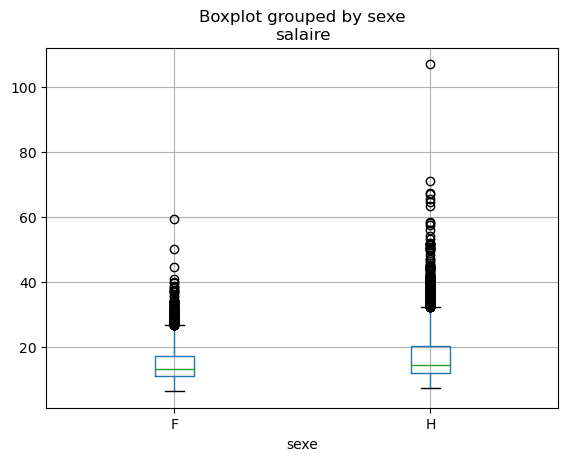

In [13]:
plt.figure(figsize=(10,10))
salaires_sexe_cat.boxplot('salaire', by='sexe')
plt.show();

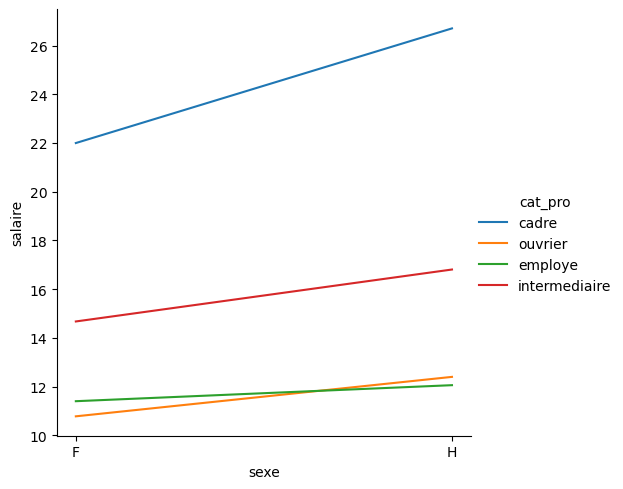

In [14]:
sns.relplot(x='sexe',y='salaire',data=salaires_sexe_cat,hue='cat_pro',kind='line',ci=None);